<a href="https://colab.research.google.com/github/dannynew111/erp-clustering-smart-meter-data/blob/main/EDA_visualisations_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Setup and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive')

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# Set file path
processed_data_dir = '/content/drive/MyDrive/ERP/data_loaded/'
file_path = os.path.join(processed_data_dir, 'final_dataset_v5_definitive.csv')

print(f"Loading data from: {file_path}")
df = pd.read_csv(file_path)

print("Data loaded successfully.")
print(f"Dataset contains {df.shape[0]} households and {df.shape[1]} features.")
print("\nSummary Statistics")

#Visualisation 1: Summary Statistics
display(df.describe().T)

Mounted at /content/drive
Loading data from: /content/drive/MyDrive/ERP/data_loaded/final_dataset_v5_definitive.csv
Data loaded successfully.
Dataset contains 1025 households and 23 features.

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
peak_reduction_weekday,1025.0,0.040255,0.080430,-0.380522,0.002783,0.029507,0.068431,0.420097
peak_reduction_weekend,1025.0,0.027541,0.078804,-0.359085,-0.008775,0.018673,0.057335,0.366244
load_shift_weekday,1025.0,0.021879,0.056166,-0.280073,-0.004876,0.011370,0.034156,0.514766
peak_reduction_pct_weekday,1025.0,13.306525,26.655172,-196.724787,1.952597,15.568497,28.474494,90.318957
peak_reduction_pct_weekend,1025.0,7.856049,27.856848,-184.326607,-5.638033,10.531696,24.834660,89.076415
intrinsic_daily_volatility,1025.0,3.217024,2.815663,0.132881,1.474465,2.455022,3.969351,25.174009
intrinsic_load_factor,1025.0,0.480293,0.135567,0.053554,0.388169,0.486288,0.571509,0.917901
base_peak_to_offpeak_ratio,1025.0,1.458656,0.363301,0.534832,1.217584,1.408544,1.631184,4.096164
base_day_to_night_ratio,1025.0,1.293181,0.412880,0.383195,1.024647,1.209260,1.492377,5.354248
base_morning_vs_evening_peak_ratio,1025.0,1.016337,0.190505,0.370406,0.916914,1.004159,1.095338,2.308459


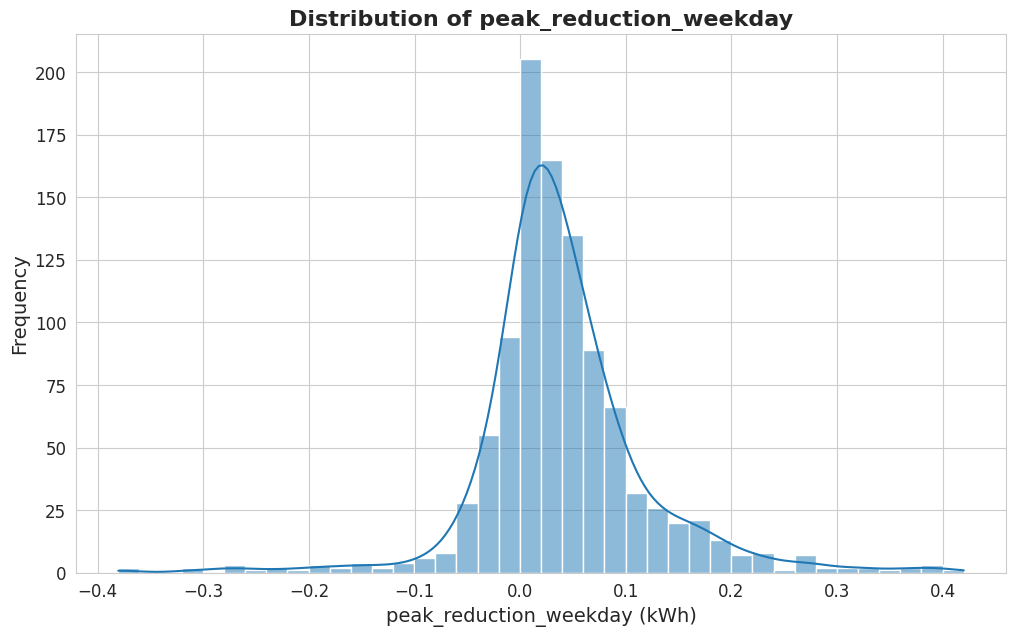

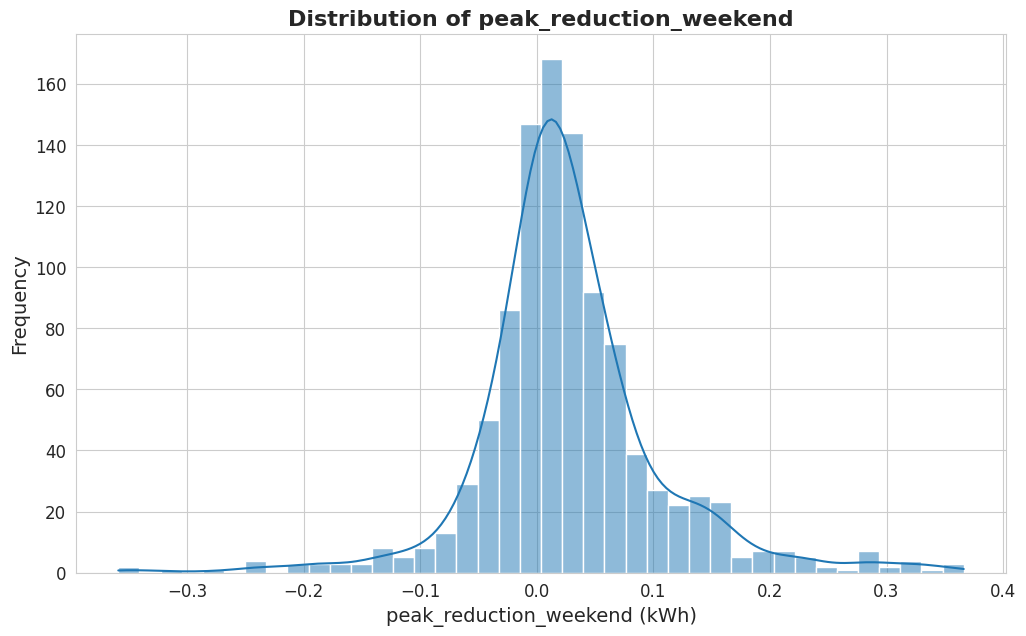

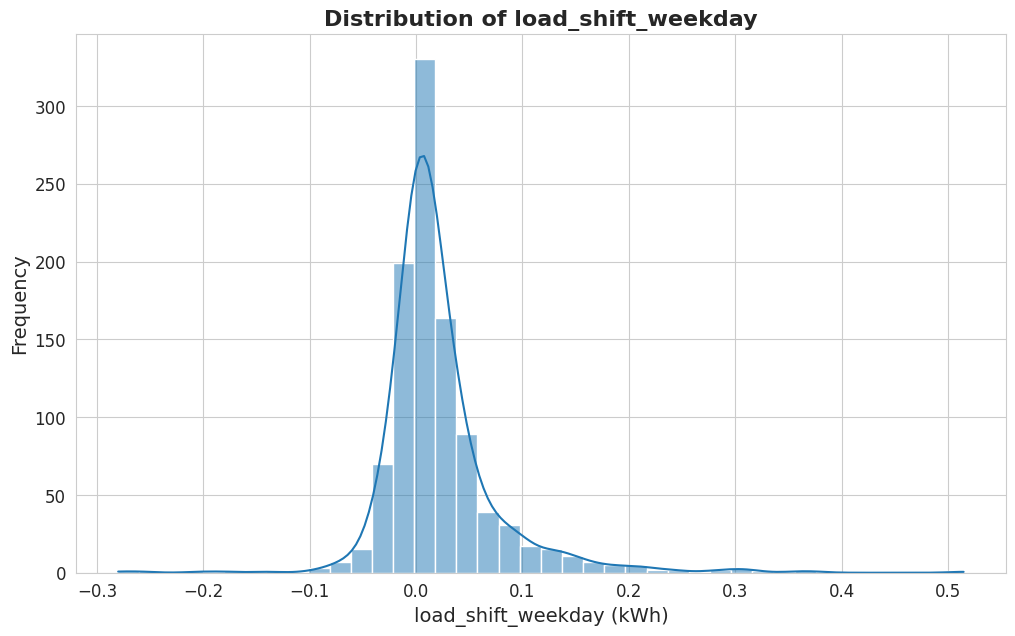

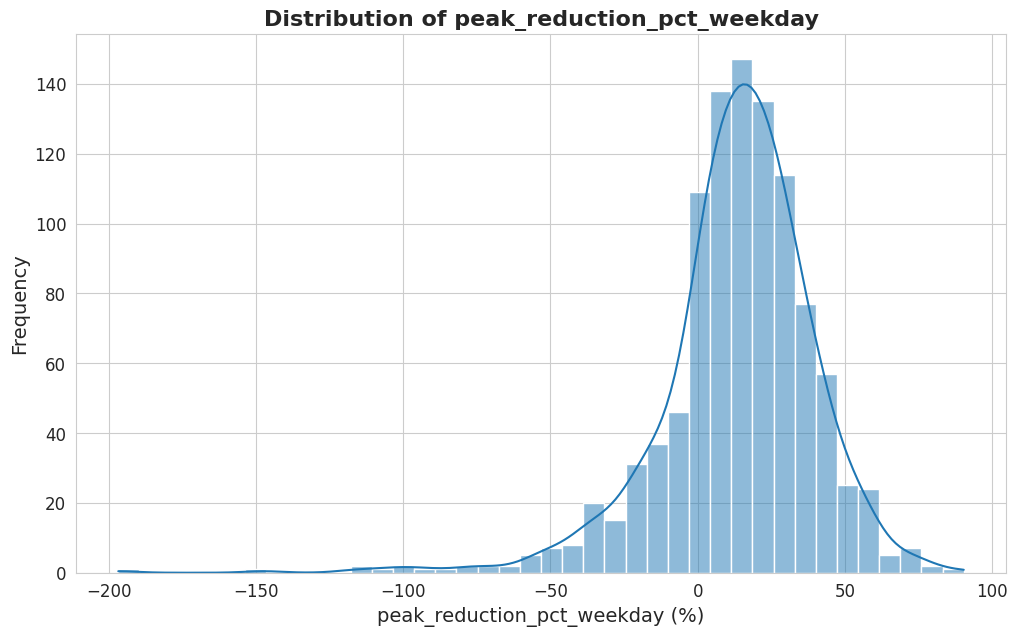

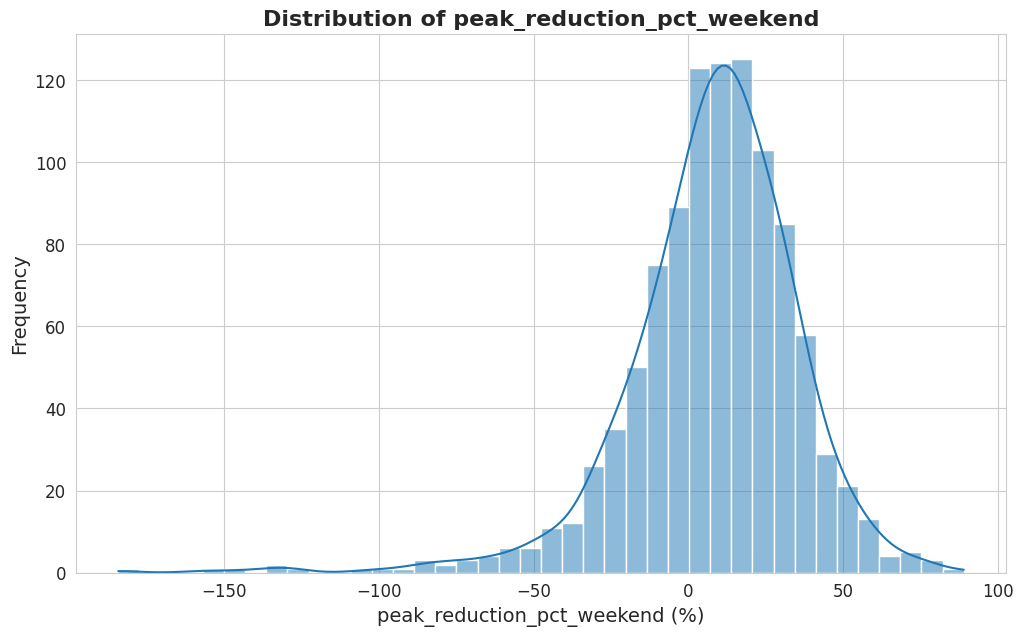

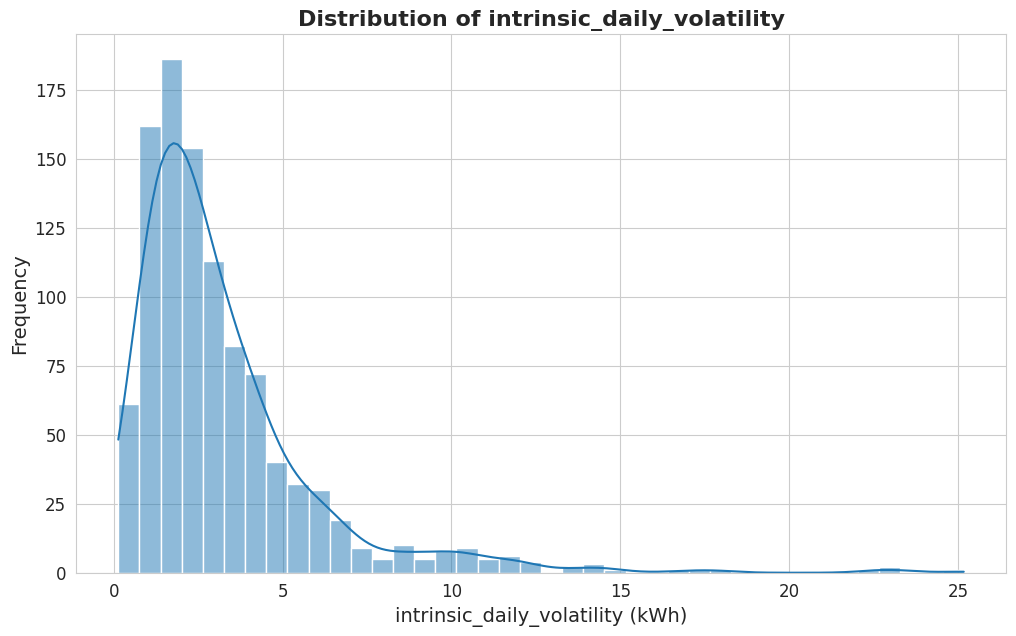

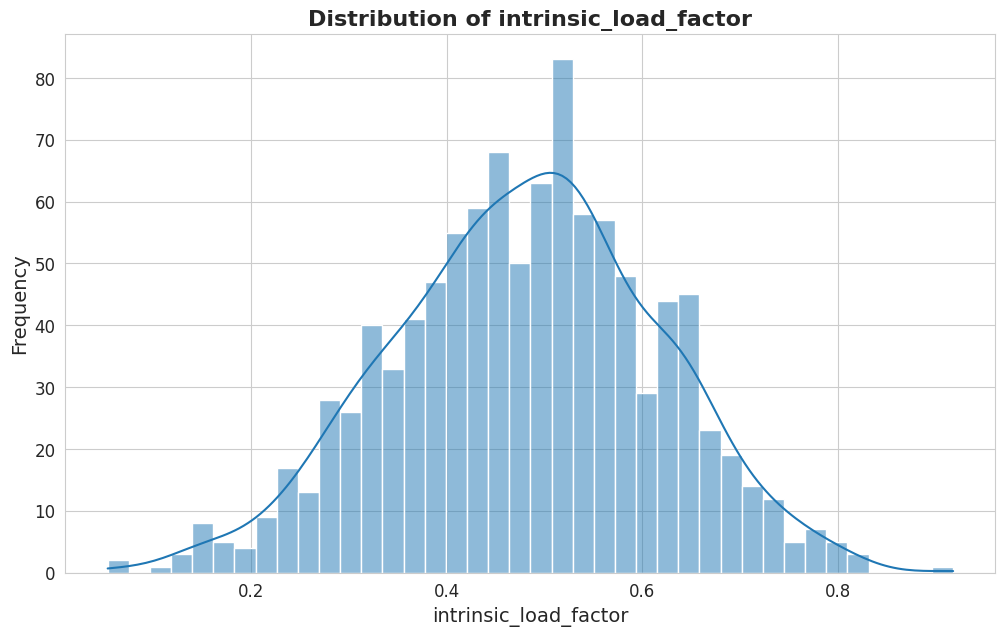

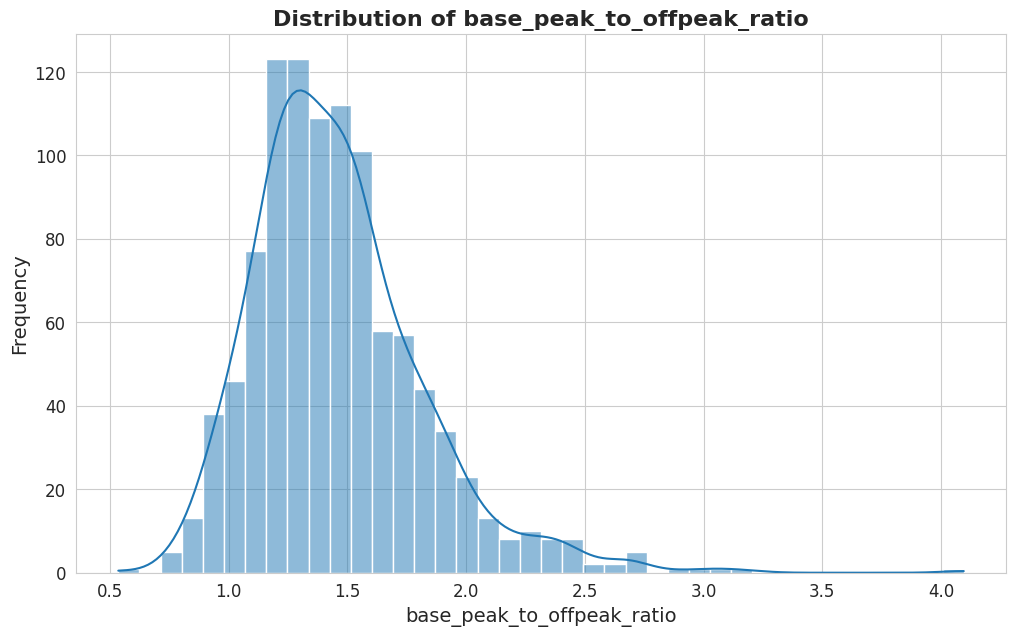

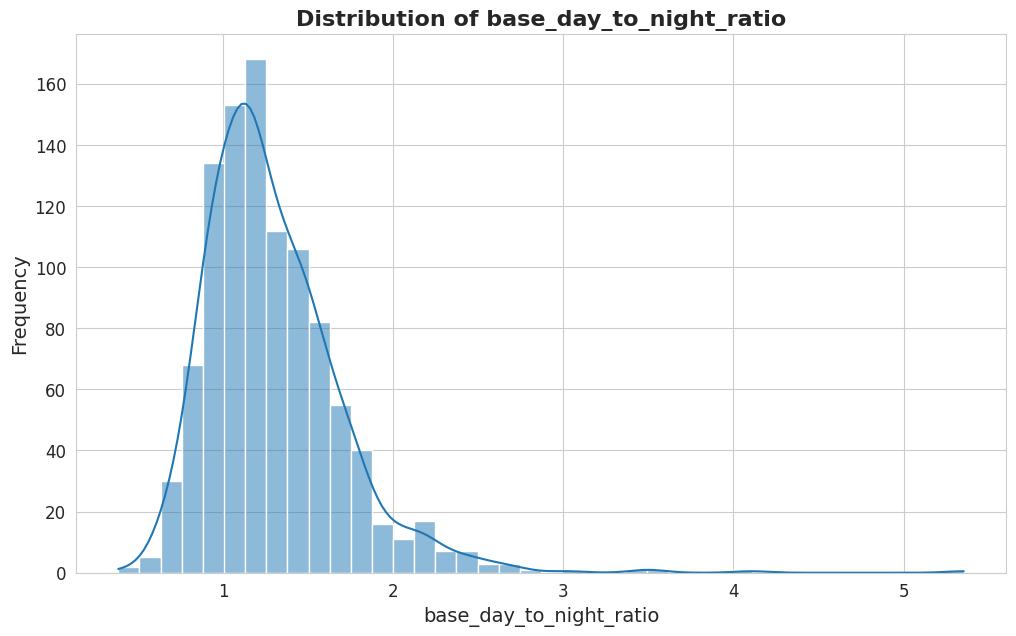

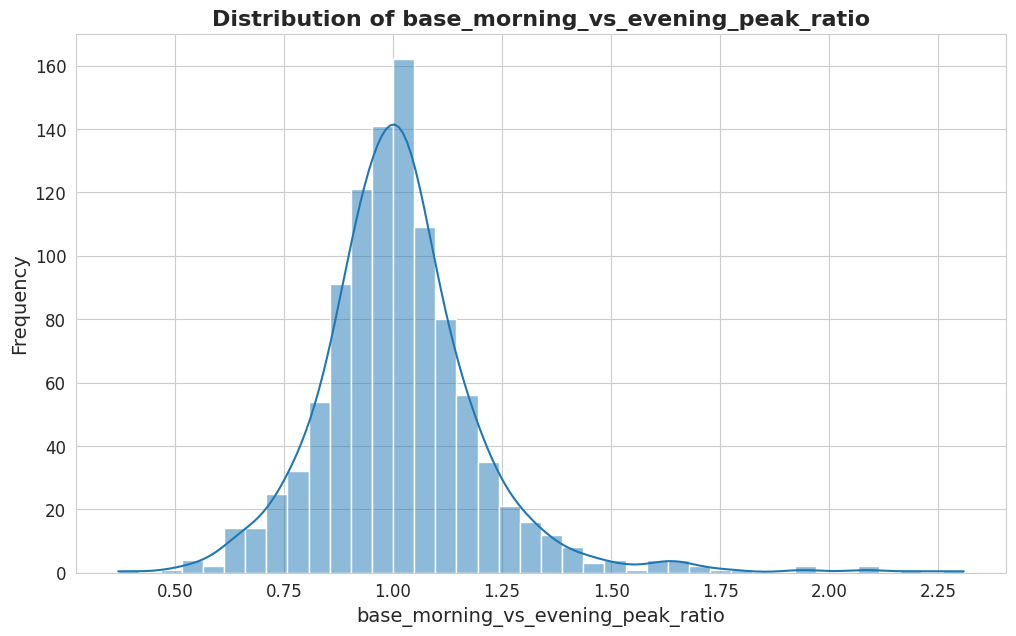

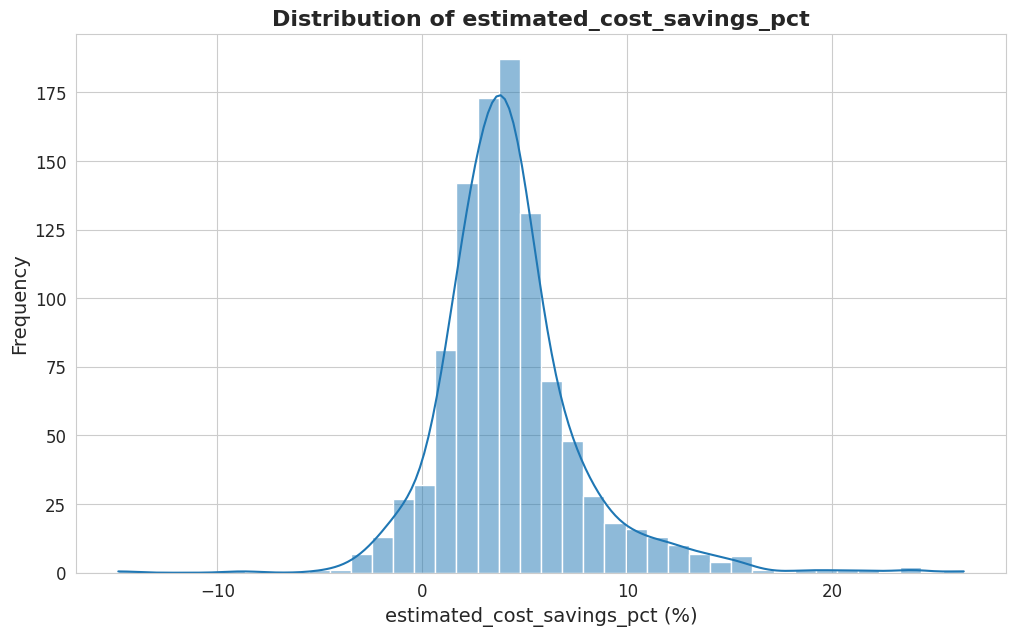

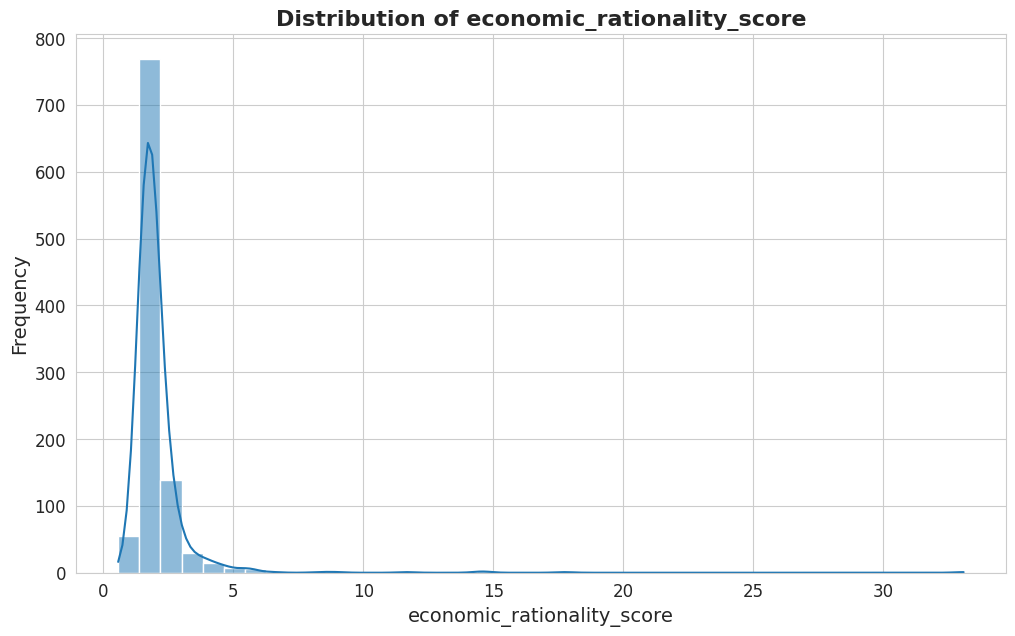

In [3]:
# Visualisation 2: Feature Distribution Histograms (with Units)

# Dictionary to hold the units for each feature
feature_units = {
    'peak_reduction_weekday': '(kWh)', 'peak_reduction_weekend': '(kWh)',
    'peak_reduction_pct_weekday': '(%)', 'peak_reduction_pct_weekend': '(%)',
    'load_shift_weekday': '(kWh)',
    'intrinsic_daily_volatility': '(kWh)', 'intrinsic_load_factor': '',
    'base_peak_to_offpeak_ratio': '', 'base_day_to_night_ratio': '',
    'base_morning_vs_evening_peak_ratio': '',
    'estimated_cost_savings_pct': '(%)', 'economic_rationality_score': ''
}
features_to_plot = [col for col in df.columns if col in feature_units]
for feature in features_to_plot:
    plt.figure()
    sns.histplot(df[feature], kde=True, bins=40)
    unit = feature_units.get(feature, '')
    xlabel_text = f'{feature} {unit}'.strip()
    plt.title(f'Distribution of {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(xlabel_text, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

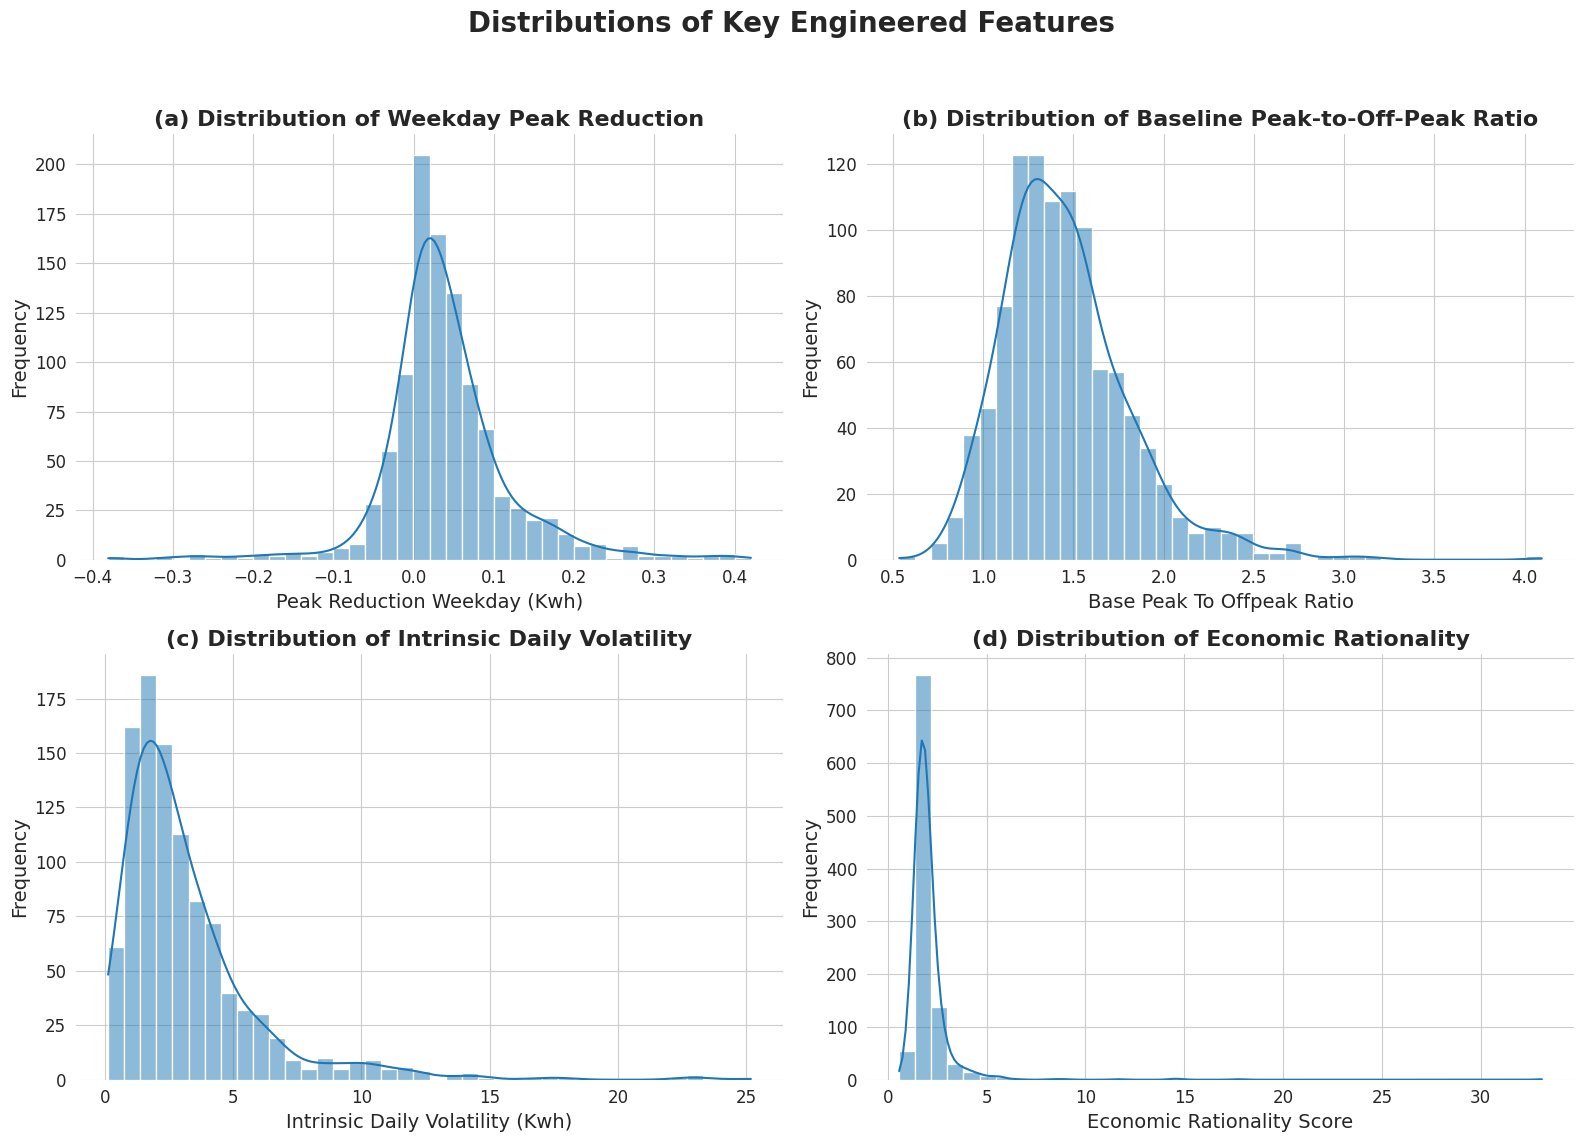

In [5]:
#EDITING FOR REPORT WRITEUP
#Here I am creating a visualisation where I combine the 4 key histograms I identified
#using literature to find key features. Helps readability of report

sns.set_style("whitegrid")

#  1. Define the features and their professional titles for the plot
features_of_interest = [
    'peak_reduction_weekday',
    'base_peak_to_offpeak_ratio',
    'intrinsic_daily_volatility',
    'economic_rationality_score'
]

# More formal titles for each subplot
plot_titles = [
    'Distribution of Weekday Peak Reduction',
    'Distribution of Baseline Peak-to-Off-Peak Ratio',
    'Distribution of Intrinsic Daily Volatility',
    'Distribution of Economic Rationality'
]

# Dictionary to hold the units for each feature
feature_units = {
    'peak_reduction_weekday': '(kWh)',
    'base_peak_to_offpeak_ratio': '',
    'intrinsic_daily_volatility': '(kWh)',
    'economic_rationality_score': ''
}

#  2. Create the 2x2 Subplot Figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Add a main title for the entire figure
fig.suptitle('Distributions of Key Engineered Features', fontsize=20, fontweight='bold')

#  3. Loop through features and plot on the correct subplot
for i, ax in enumerate(axes.flatten()):
    feature = features_of_interest[i]
    title = plot_titles[i]

    sns.histplot(data=df, x=feature, kde=True, bins=40, ax=ax)

    #  4. Set professional titles and labels for each subplot
    ax.set_title(f'({chr(97+i)}) {title}', fontsize=16, fontweight='bold')

    unit = feature_units.get(feature, '')
    xlabel_text = f'{feature} {unit}'.strip().replace('_', ' ').title()
    ax.set_xlabel(xlabel_text, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Remove the outer plot borders (spines) for a cleaner look
    # This is because I have been having issues eliminating the "double gridline" effect.
    sns.despine(ax=ax, left=True, bottom=True)

#  5. Final adjustments and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

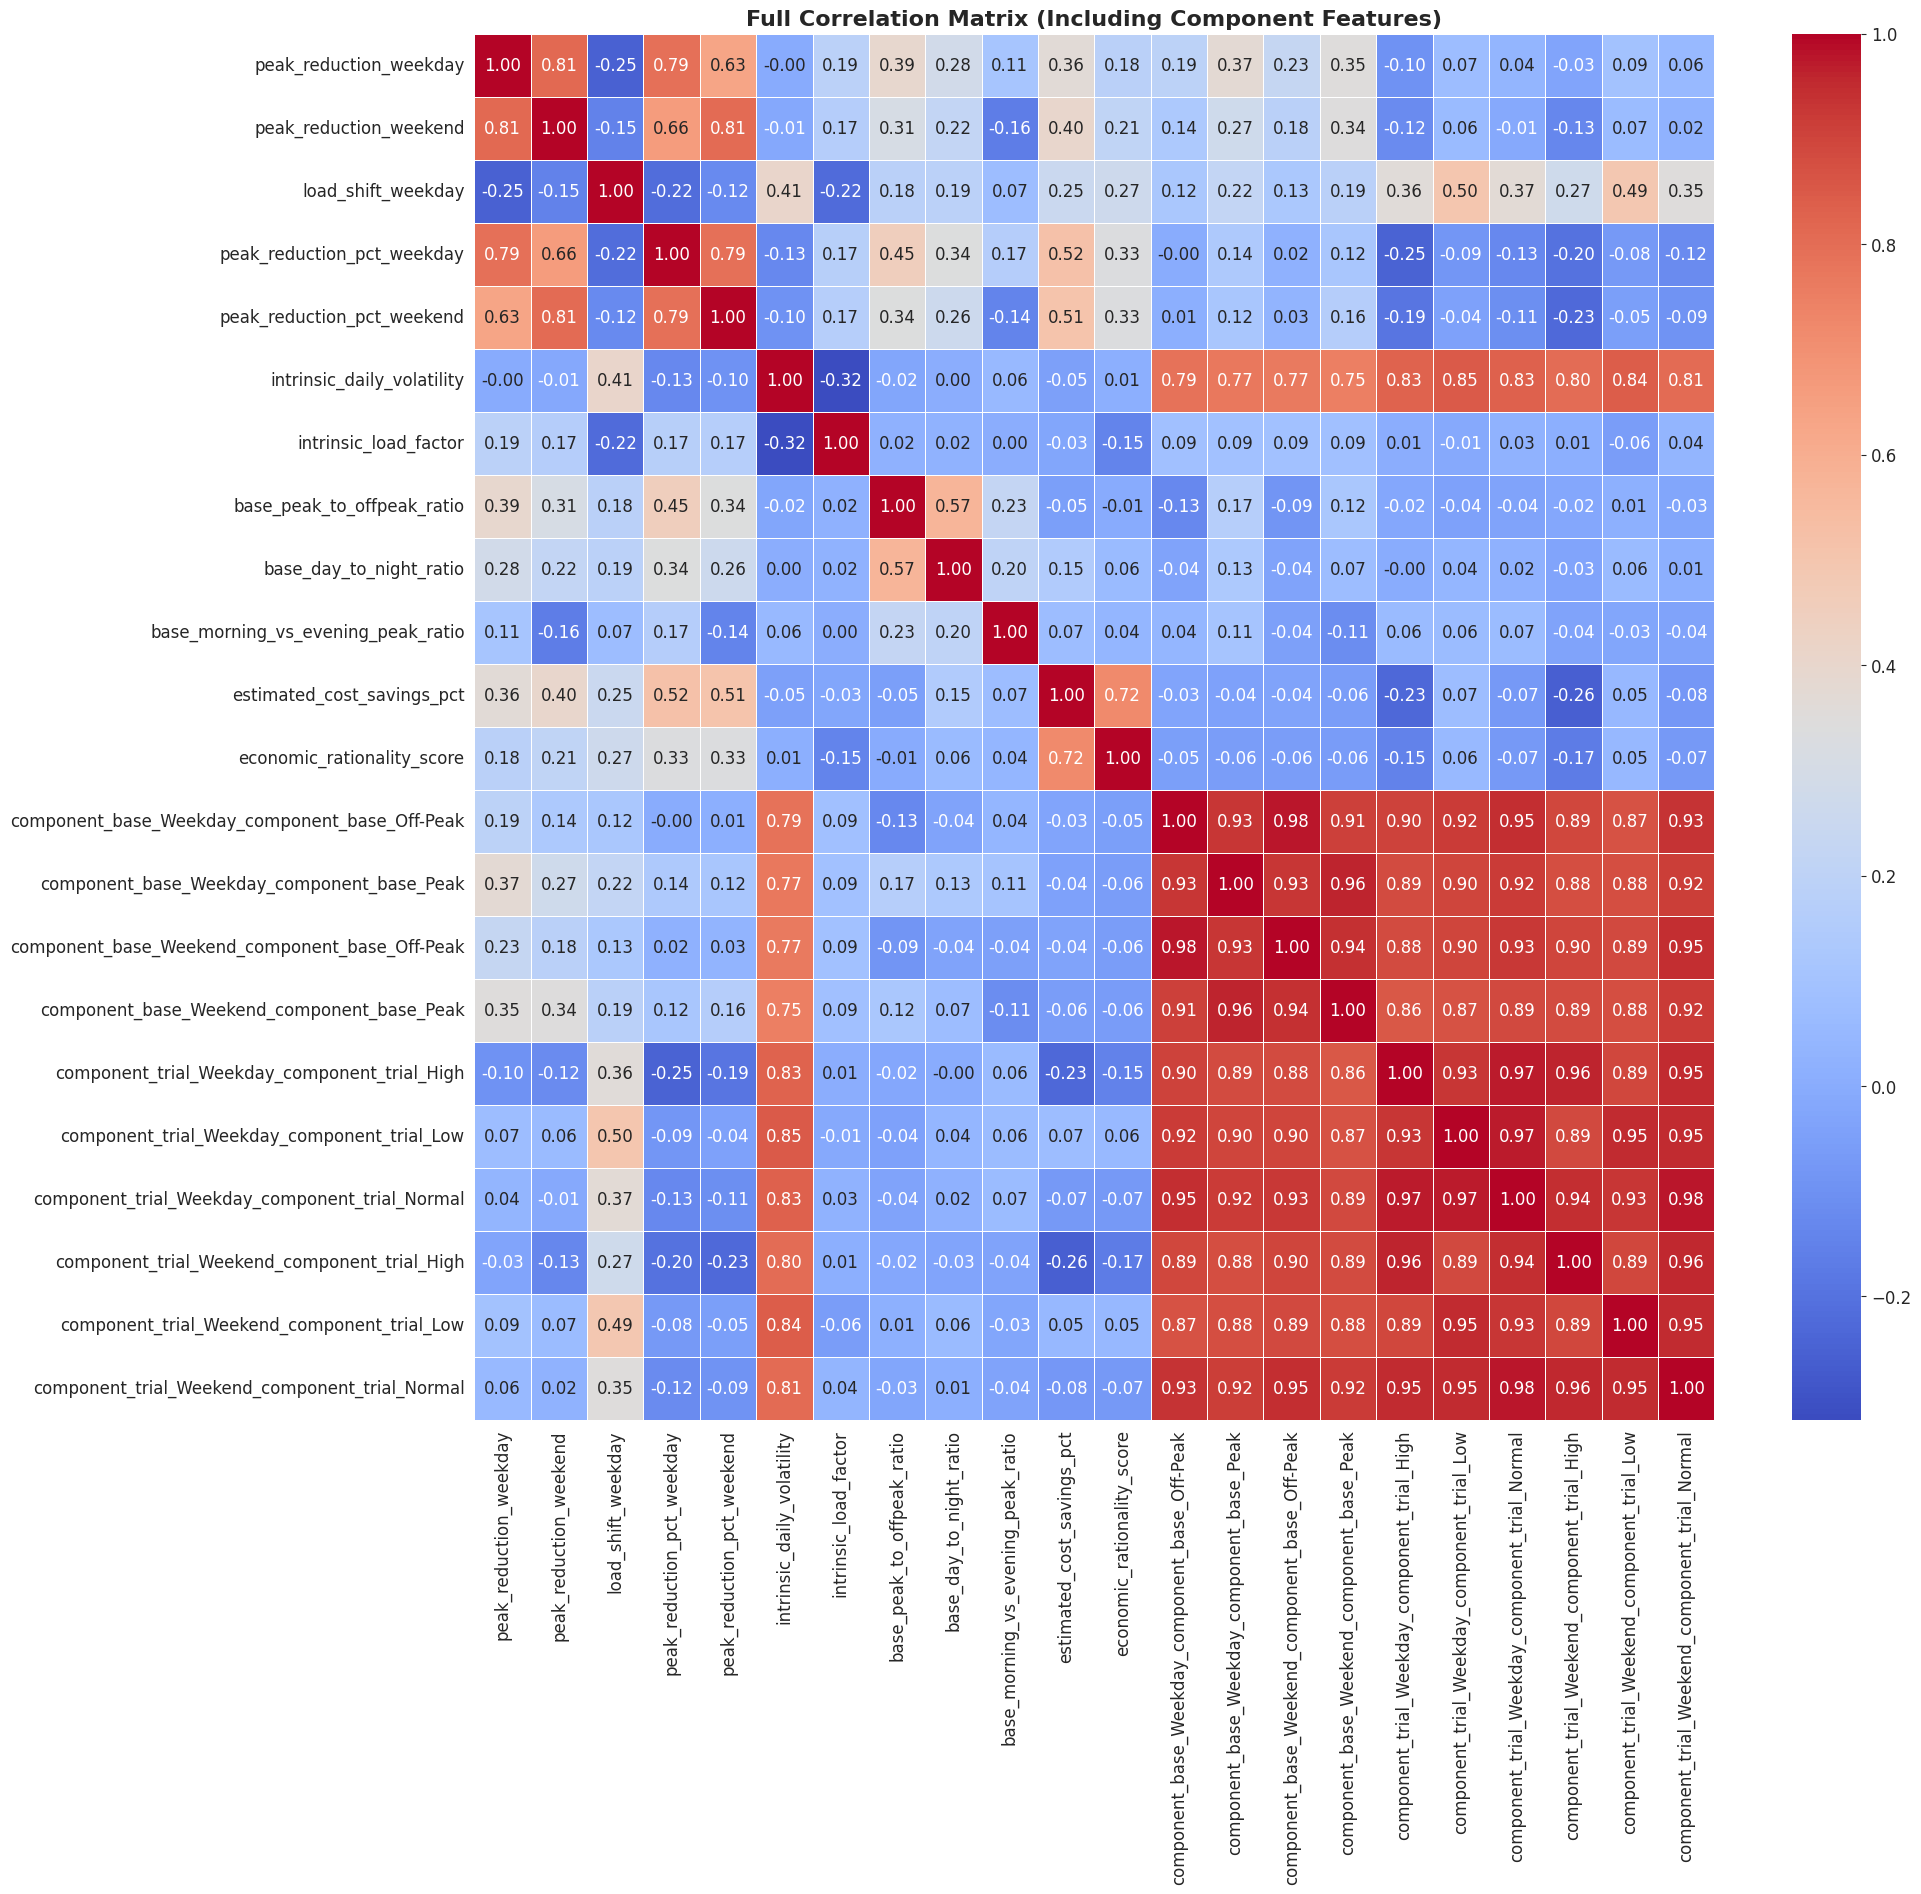

In [6]:
# Visualisation 3: Full Correlation Heatmap
# Note for supervisor: I am using the new ID column name (no long 'LCLid' as using new dataset with linked survey data)
#ID number is dropped because I don't want its correlation with actual features!
full_corr_matrix = df.drop(columns=['Household_id']).corr()

plt.figure(figsize=(20, 18))
sns.heatmap(full_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Full Correlation Matrix (Including Component Features)', fontsize=16, fontweight='bold')
plt.show()

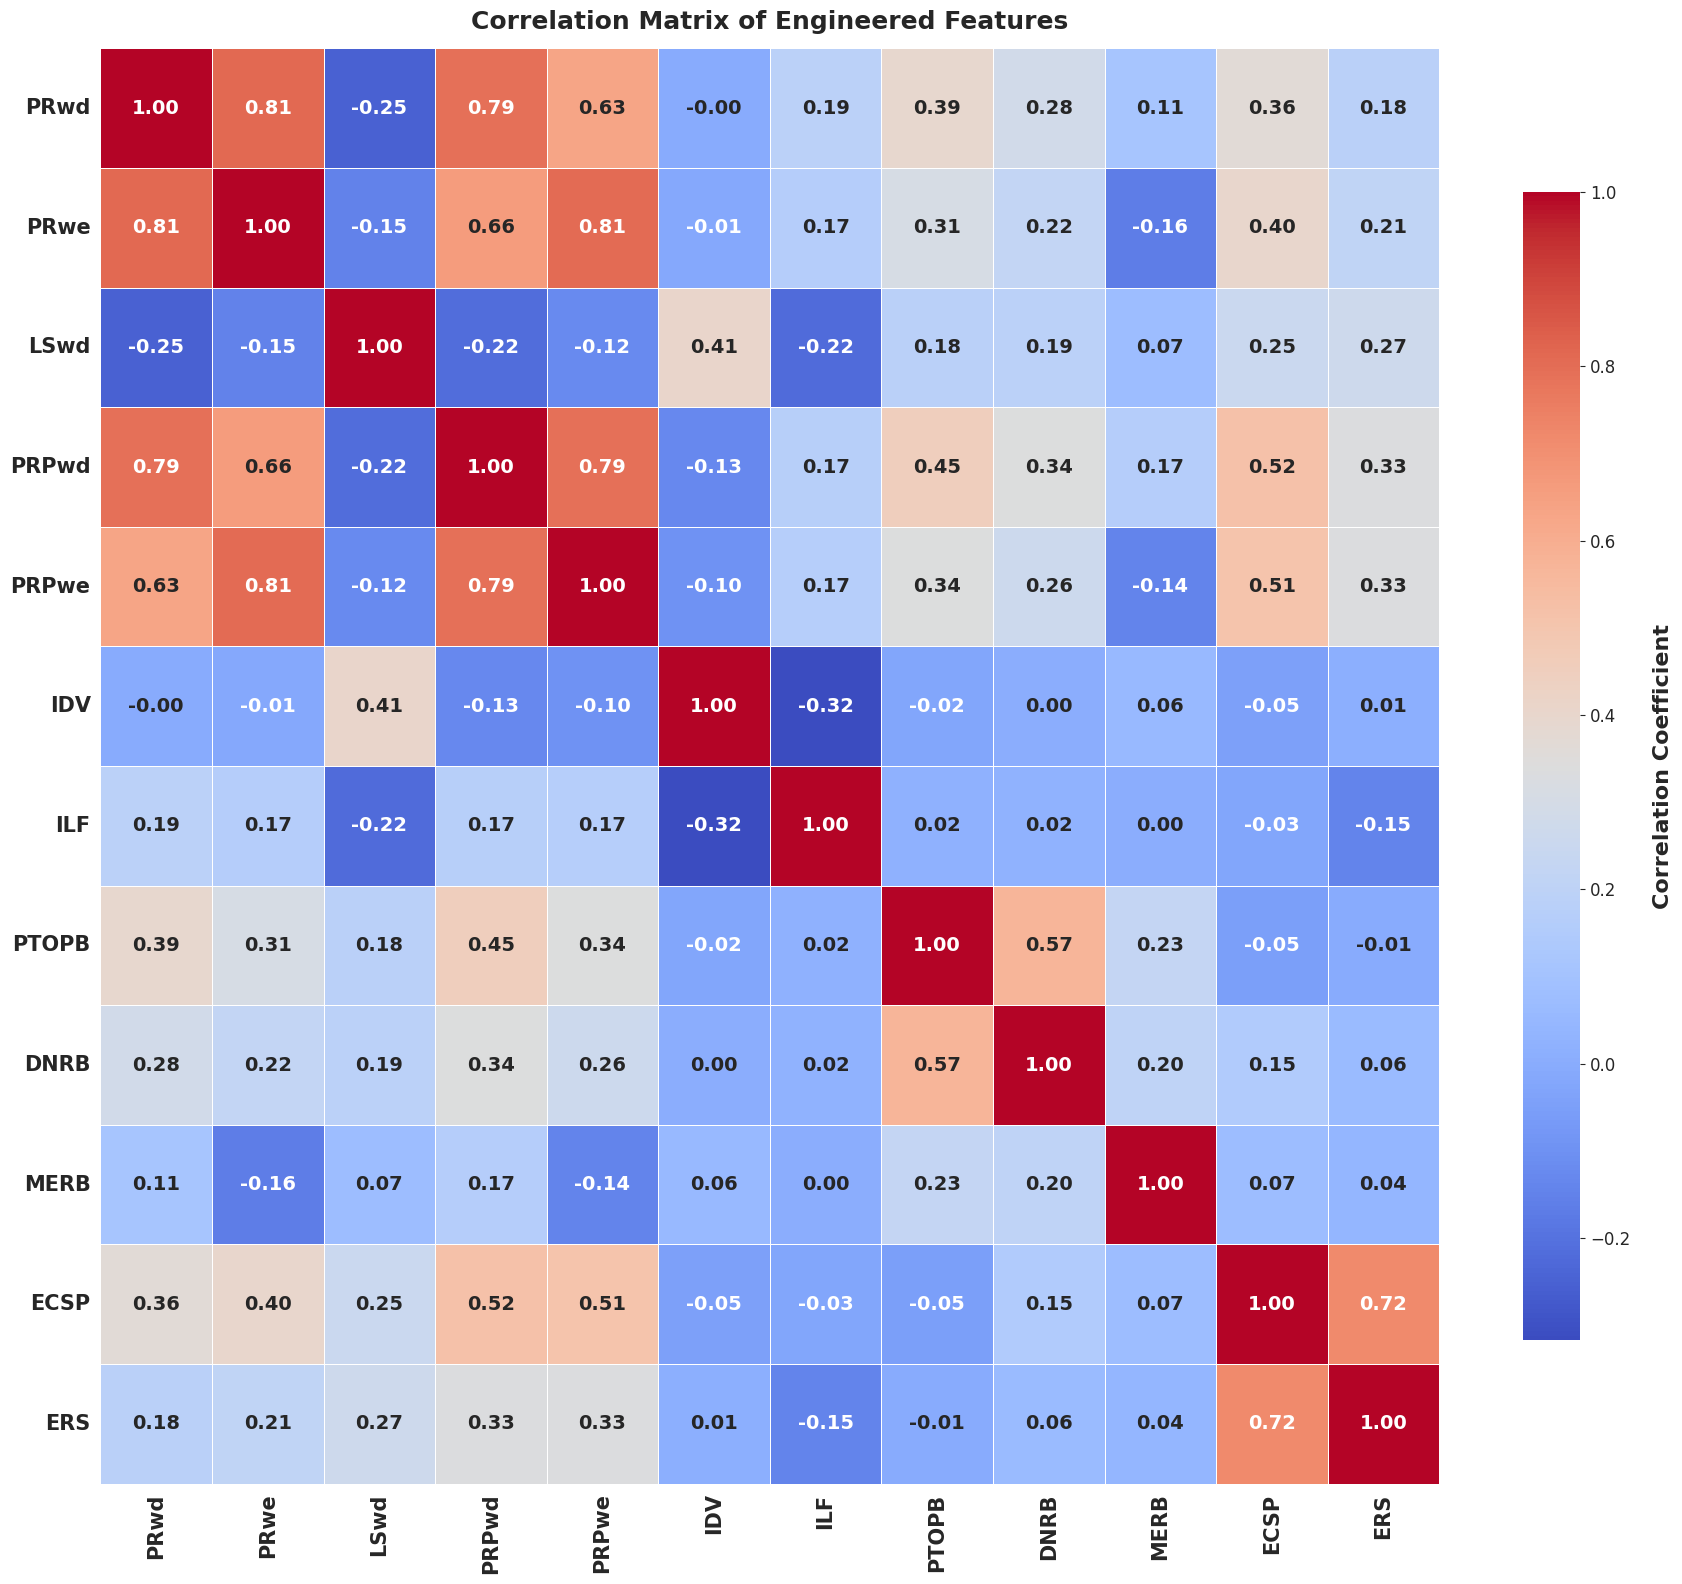

In [7]:
# Improved Figure 3: Correlation Matrix (readable, de-cluttered) for report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#features of interest - too many on the 20x20 makes a bad visual.
final_feature_columns = [
    'peak_reduction_weekday','peak_reduction_weekend','load_shift_weekday',
    'peak_reduction_pct_weekday','peak_reduction_pct_weekend',
    'intrinsic_daily_volatility','intrinsic_load_factor',
    'base_peak_to_offpeak_ratio','base_day_to_night_ratio',
    'base_morning_vs_evening_peak_ratio','estimated_cost_savings_pct',
    'economic_rationality_score'
]

#abbreviate names to make clearer visualisaiton.
label_map = {
    'peak_reduction_weekday': 'PRwd',
    'peak_reduction_weekend': 'PRwe',
    'peak_reduction_pct_weekday': 'PRPwd',
    'peak_reduction_pct_weekend': 'PRPwe',
    'load_shift_weekday': 'LSwd',
    'intrinsic_daily_volatility': 'IDV',
    'intrinsic_load_factor': 'ILF',
    'base_peak_to_offpeak_ratio': 'PTOPB',
    'base_day_to_night_ratio': 'DNRB',
    'base_morning_vs_evening_peak_ratio': 'MERB',
    'estimated_cost_savings_pct': 'ECSP',
    'economic_rationality_score': 'ERS',
    'trait_constraint_score': 'TCS',
    'trait_engagement_score': 'TES'
}

# Subset defensively and rename JUST for plotting
available = [c for c in final_feature_columns if c in df.columns]
df_plot = df[available].copy()
df_plot.rename(columns=label_map, inplace=True)

# Build correlation matrix with the nice labels
corr_matrix = df_plot.corr()

plt.figure(figsize=(18, 16))
ax = sns.heatmap(
    corr_matrix,
    annot=True, annot_kws={"size": 14, "weight": "bold"},
    cmap="coolwarm", fmt=".2f",
    linewidths=.5, linecolor="white",
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=90, fontsize=15, fontweight='bold')
plt.yticks(rotation=0, fontsize=15, fontweight='bold')

cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Coefficient', fontweight='bold', fontsize=16, labelpad=16)

plt.title('Correlation Matrix of Engineered Features', fontsize=18, fontweight='bold', pad=14)
plt.tight_layout()
plt.show()




Hypothesis Scatter Plot 1: Intrinsic vs. Response


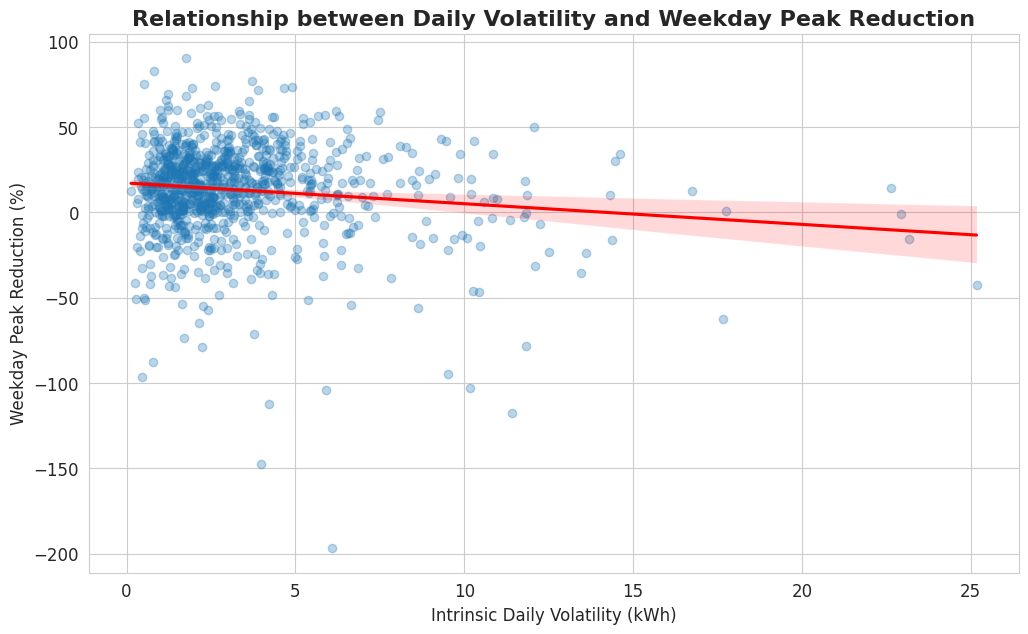

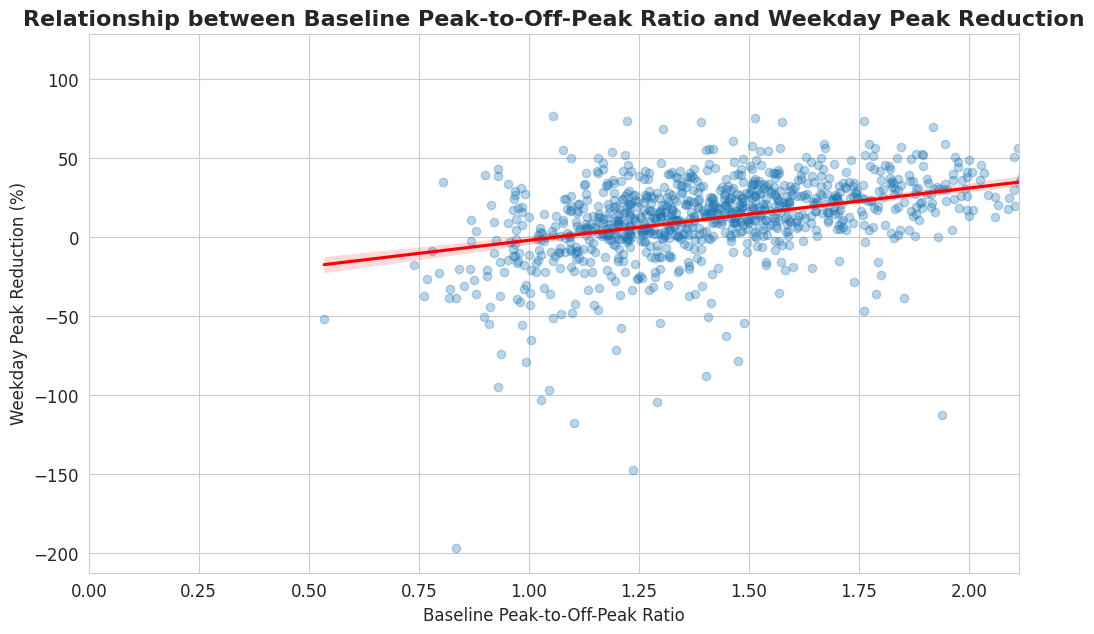

In [9]:
# Visualisation 4: Hypothesis-Driven Scatter Plots (Behaviour vs Intrinsic)

# Hypothesis 1: Relationship between lifestyle predictability and responsiveness
print("\nHypothesis Scatter Plot 1: Intrinsic vs. Response")
plt.figure()
sns.regplot(data=df, x='intrinsic_daily_volatility', y='peak_reduction_pct_weekday', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship between Daily Volatility and Weekday Peak Reduction', fontsize=16, fontweight='bold')
plt.xlabel('Intrinsic Daily Volatility (kWh)', fontsize=12)
plt.ylabel('Weekday Peak Reduction (%)', fontsize=12)
plt.show()

# Hypothesis 2: Relationship between routine "peakiness" and responsiveness
plt.figure()
sns.regplot(data=df, x='base_peak_to_offpeak_ratio', y='peak_reduction_pct_weekday', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship between Baseline Peak-to-Off-Peak Ratio and Weekday Peak Reduction', fontsize=16, fontweight='bold')
plt.xlabel('Baseline Peak-to-Off-Peak Ratio', fontsize=12)
plt.ylabel('Weekday Peak Reduction (%)', fontsize=12)
plt.xlim(0, df['base_peak_to_offpeak_ratio'].quantile(0.95))
plt.show()


Hypothesis Scatter Plots: Financial Outcomes


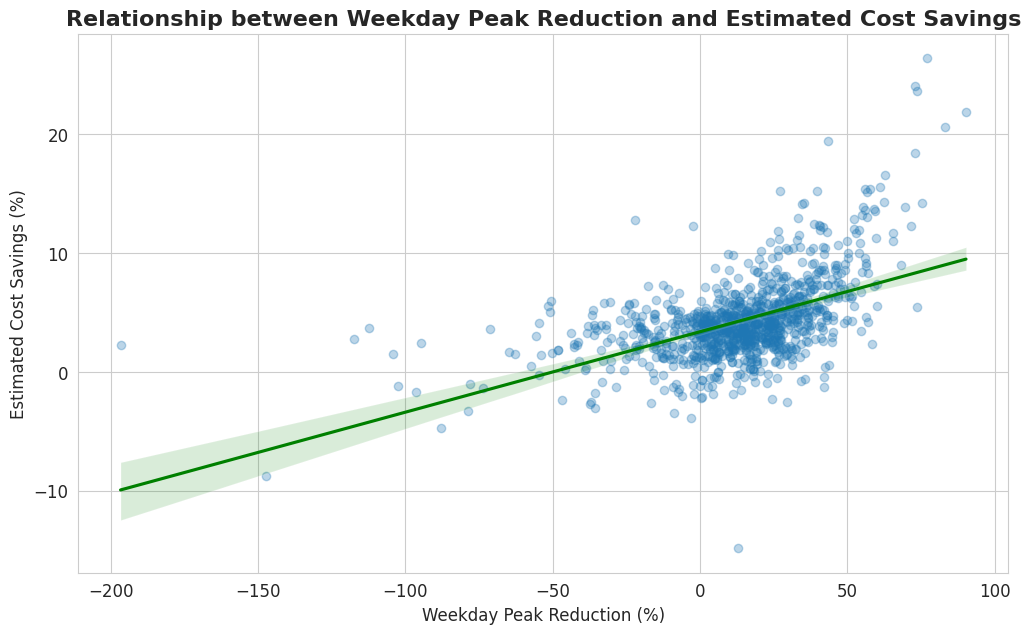

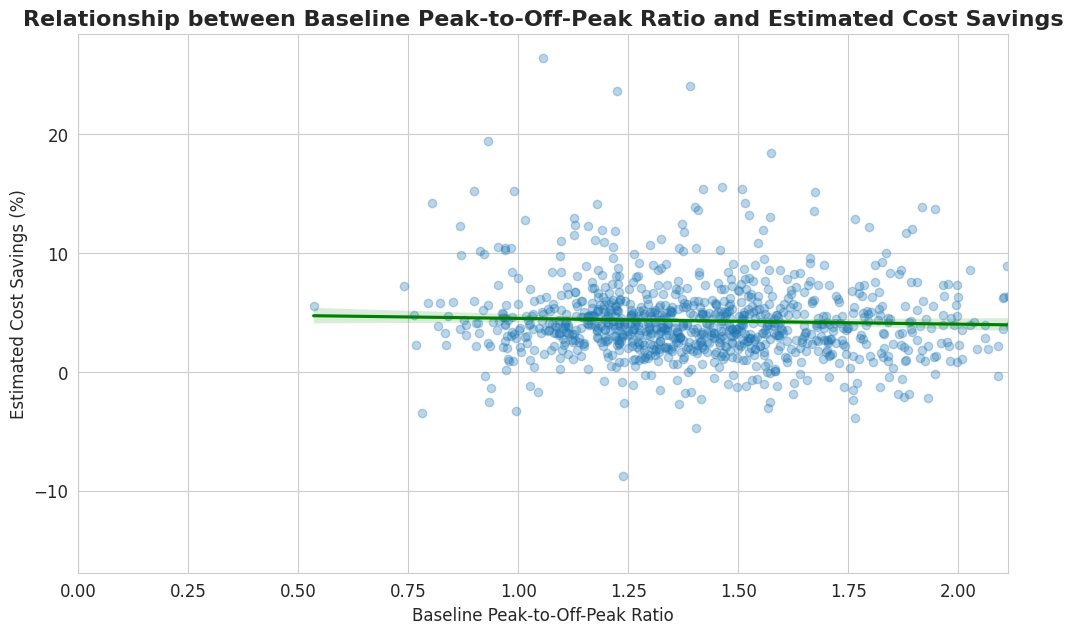

In [10]:
# Visualisation 5: Hypothesis-Driven Scatter Plots (Financial Focus)
print("\nHypothesis Scatter Plots: Financial Outcomes")
plt.figure()
sns.regplot(data=df, x='peak_reduction_pct_weekday', y='estimated_cost_savings_pct', scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Relationship between Weekday Peak Reduction and Estimated Cost Savings', fontsize=16, fontweight='bold')
plt.xlabel('Weekday Peak Reduction (%)', fontsize=12)
plt.ylabel('Estimated Cost Savings (%)', fontsize=12)
plt.show()

plt.figure()
sns.regplot(data=df, x='base_peak_to_offpeak_ratio', y='estimated_cost_savings_pct', scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Relationship between Baseline Peak-to-Off-Peak Ratio and Estimated Cost Savings', fontsize=16, fontweight='bold')
plt.xlabel('Baseline Peak-to-Off-Peak Ratio', fontsize=12)
plt.ylabel('Estimated Cost Savings (%)', fontsize=12)
plt.xlim(0, df['base_peak_to_offpeak_ratio'].quantile(0.95))
plt.show()


Profiling Negative vs. Positive Responders


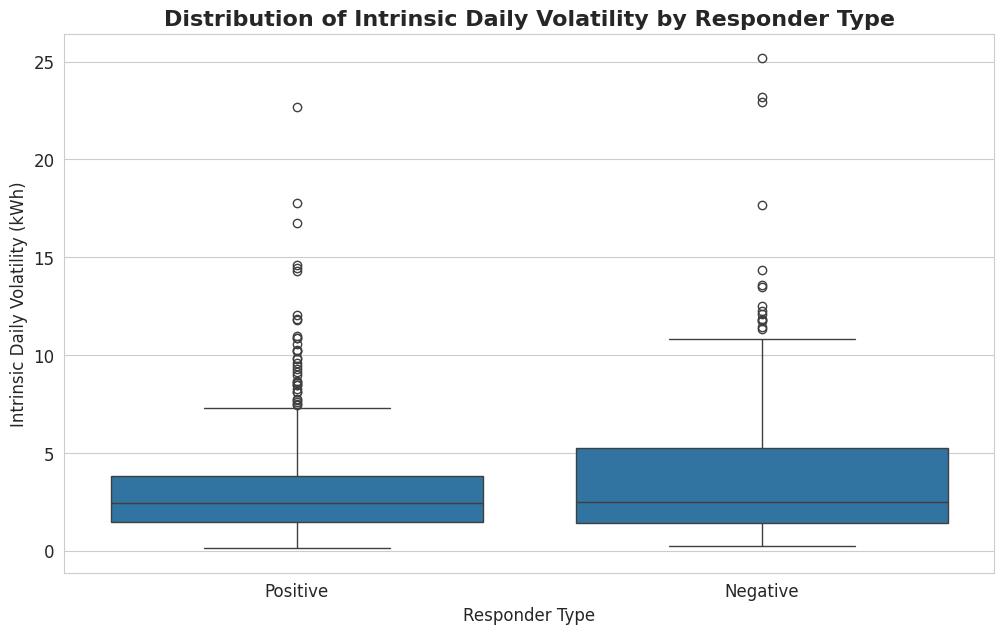


Comparing Baseline Peak-to-Off-Peak Ratio


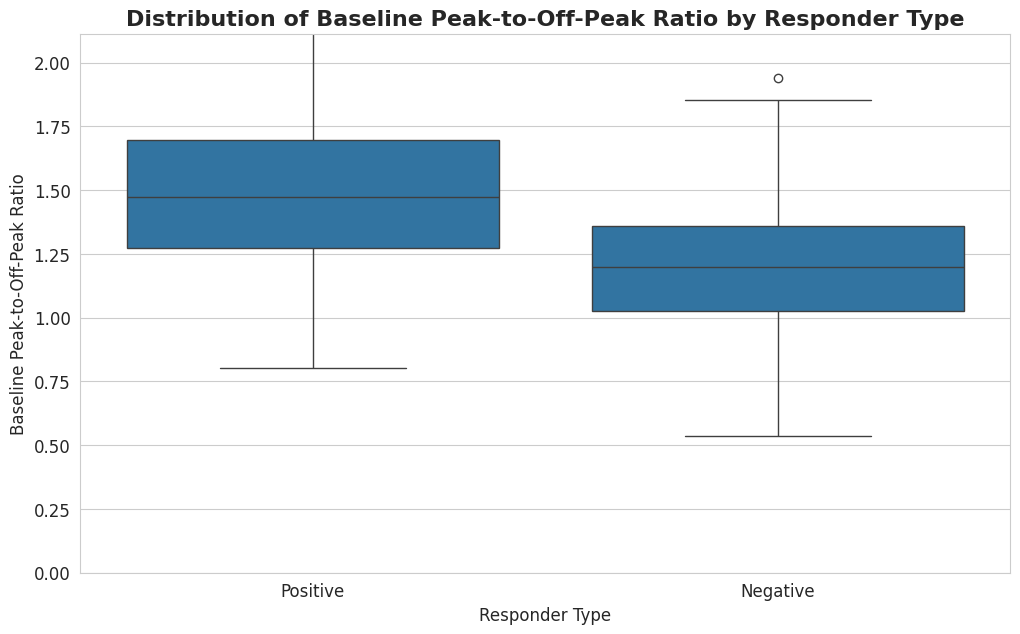


Comparing Financial Savings


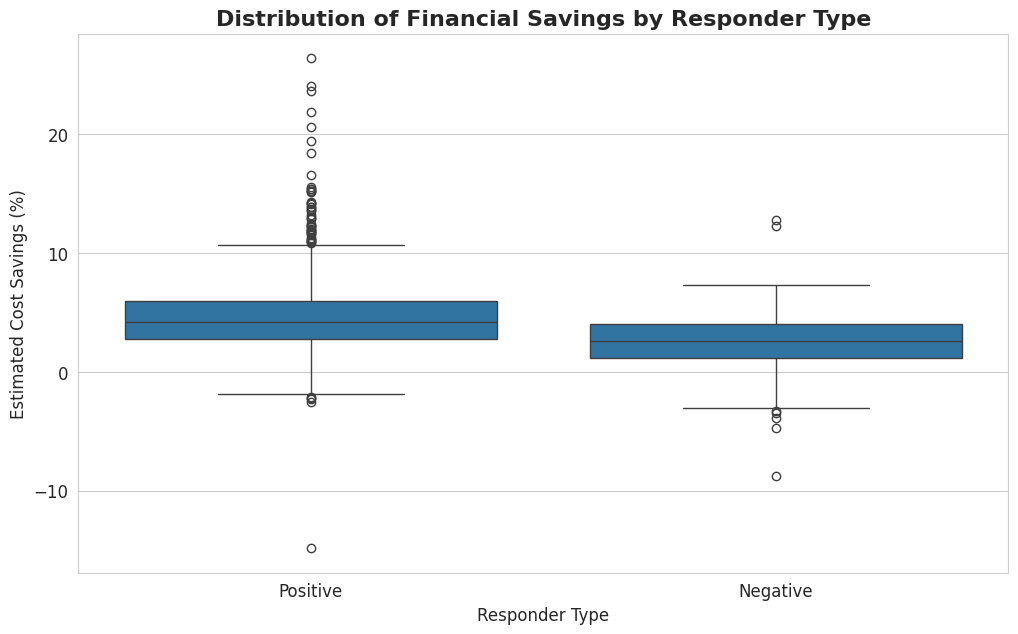

In [11]:
# Visualisation 6: Profiling Positive vs Negative Responders
print("\nProfiling Negative vs. Positive Responders")
df_temp = df.copy()

#Separating the positive (reduced consumption during peak hours) and negative (increased consumption during peak hours)
# responders for weekdays (as these are more valuable than weekends - people working and different routines)
df_temp['responder_type'] = np.where(df_temp['peak_reduction_pct_weekday'] < 0, 'Negative', 'Positive')

# Compare Intrinsic Volatility
plt.figure()
sns.boxplot(data=df_temp, x='responder_type', y='intrinsic_daily_volatility')
plt.title('Distribution of Intrinsic Daily Volatility by Responder Type', fontsize=16, fontweight='bold')
plt.xlabel('Responder Type', fontsize=12)
plt.ylabel('Intrinsic Daily Volatility (kWh)', fontsize=12)
plt.show()

# Compare Baseline "Peakiness"
print("\nComparing Baseline Peak-to-Off-Peak Ratio")
plt.figure()
sns.boxplot(data=df_temp, x='responder_type', y='base_peak_to_offpeak_ratio')
plt.title('Distribution of Baseline Peak-to-Off-Peak Ratio by Responder Type', fontsize=16, fontweight='bold')
plt.xlabel('Responder Type', fontsize=12)
plt.ylabel('Baseline Peak-to-Off-Peak Ratio', fontsize=12)
#zoom in on important area
plt.ylim(0, df_temp['base_peak_to_offpeak_ratio'].quantile(0.95))
plt.show()

# Plot 3: Compare Financial Savings (The Key Outcome)
print("\nComparing Financial Savings")
plt.figure()
sns.boxplot(data=df_temp, x='responder_type', y='estimated_cost_savings_pct')
plt.title('Distribution of Financial Savings by Responder Type', fontsize=16, fontweight='bold')
plt.xlabel('Responder Type', fontsize=12)
plt.ylabel('Estimated Cost Savings (%)', fontsize=12)
plt.show()


 Profiling Super Responders (Top 10%)


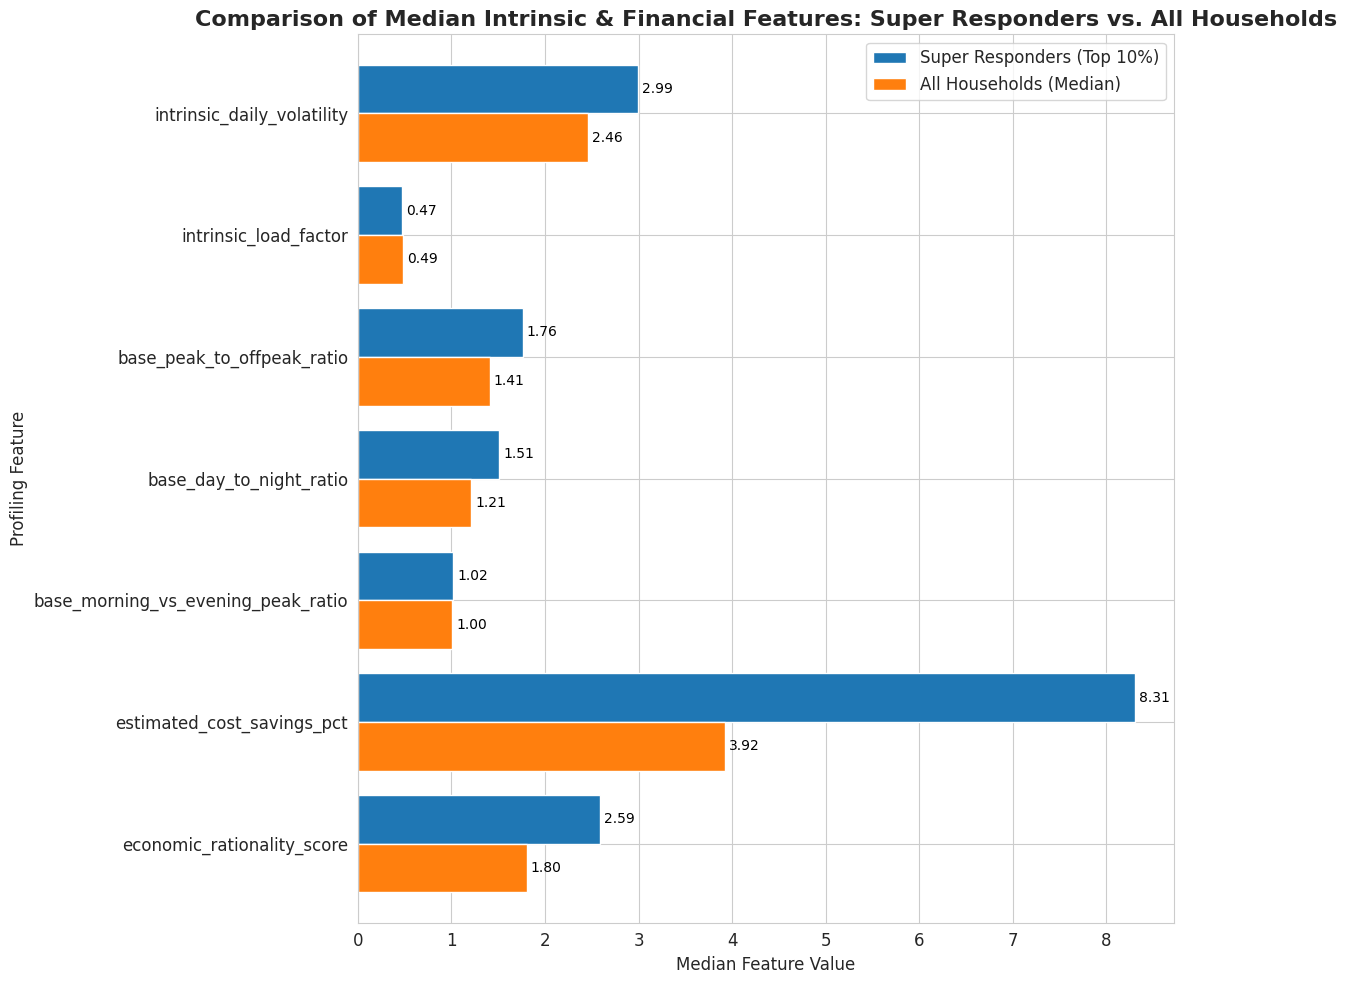

In [12]:
# Visualisation 7: Profiling 'Super Responders' (Top 10%)
#I chose this percentile abritrarily as I thought it would give a good indication
#of how the most responsive households behaved

print("\n Profiling Super Responders (Top 10%)")
threshold = df['peak_reduction_pct_weekday'].quantile(0.90)
super_responders = df[df['peak_reduction_pct_weekday'] > threshold]
profiling_cols = [
    'intrinsic_daily_volatility', 'intrinsic_load_factor', 'base_peak_to_offpeak_ratio',
    'base_day_to_night_ratio', 'base_morning_vs_evening_peak_ratio',
    'estimated_cost_savings_pct', 'economic_rationality_score'
]
profile_comparison = pd.DataFrame({
    'Super Responders (Top 10%)': super_responders[profiling_cols].median(),
    'All Households (Median)': df[profiling_cols].median()
})
ax = profile_comparison.plot(kind='barh', figsize=(12, 10), width=0.8)
plt.title('Comparison of Median Intrinsic & Financial Features: Super Responders vs. All Households', fontsize=16, fontweight='bold')
plt.xlabel('Median Feature Value', fontsize=12)
plt.ylabel('Profiling Feature', fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10, color='black')
ax.invert_yaxis()
plt.tight_layout()
plt.show()



Finally, I completed a flexibility matrix which is really important in the clustering validation (next notebook)


The Flexibility Matrix


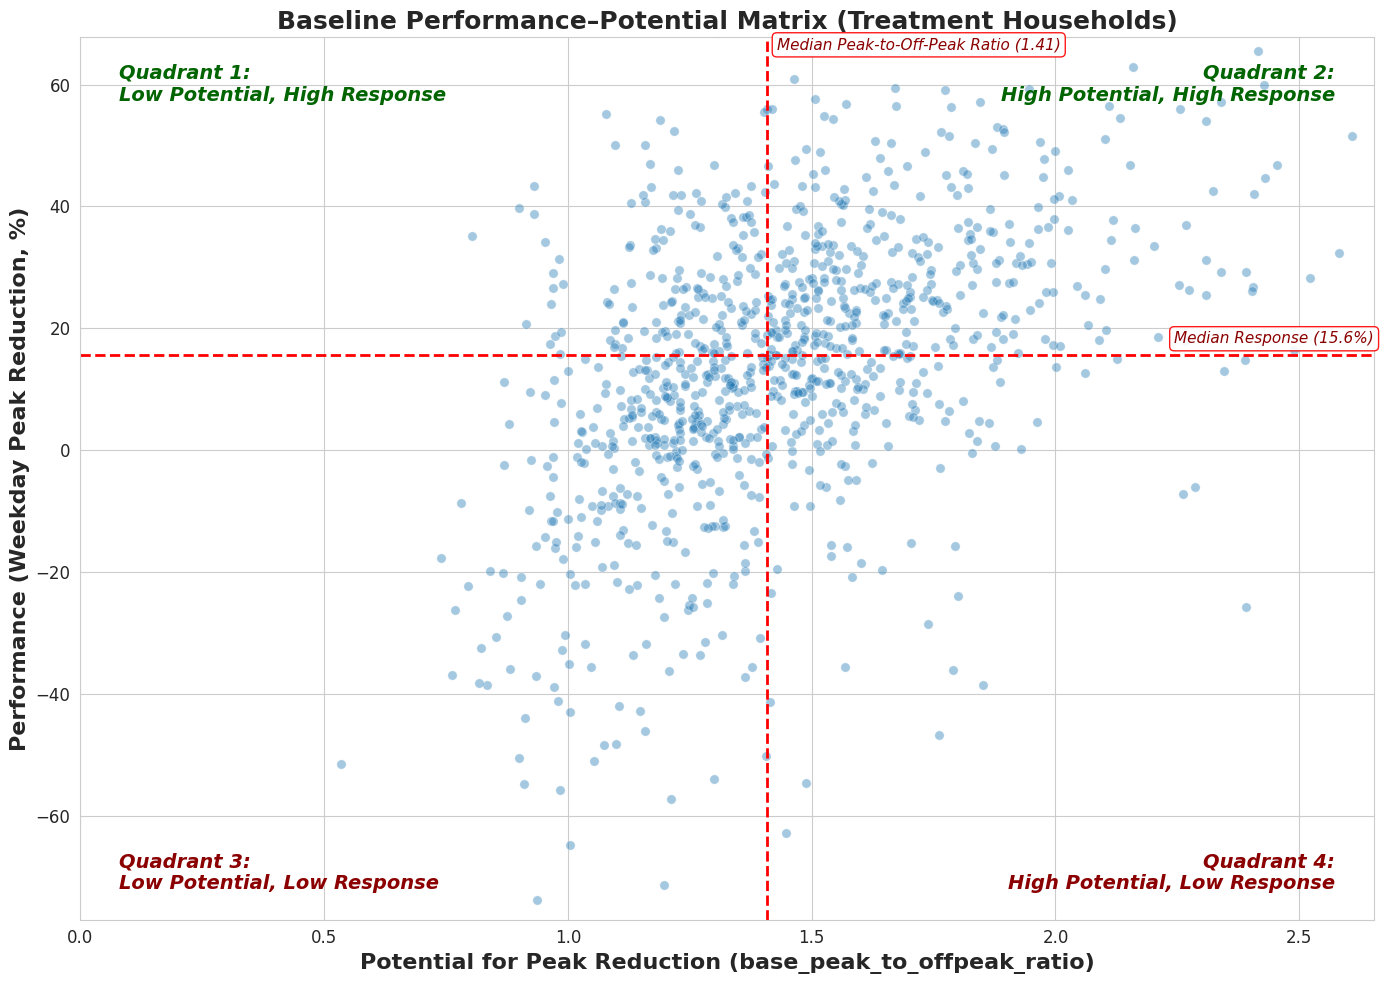

In [14]:
# Visualisation 8: The Performance-Potential Matrix Quadrant Plot
print("\nThe Flexibility Matrix")
x_feature = 'base_peak_to_offpeak_ratio'
y_feature = 'peak_reduction_pct_weekday'
x_median = df[x_feature].median()
y_median = df[y_feature].median()
plt.figure(figsize=(14, 10))
ax = sns.scatterplot(data=df, x=x_feature, y=y_feature, alpha=0.4, s=45)
ax.axvline(x_median, color='red', linestyle='--', linewidth=2)
ax.axhline(y_median, color='red', linestyle='--', linewidth=2)

# Define a background box for perfect readability
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=1, alpha=0.9)

# Place Y-axis label on the right edge, just above the line - improved visualisation
# as was messy before
ax.text(df[x_feature].quantile(0.99), y_median + 1.5, f'Median Response ({y_median:.1f}%)',
        color='darkred', ha='right', va='bottom', fontsize=11, style='italic', bbox=bbox_props)

# Place X-axis label on the top edge, just to the right of the line
ax.text(x_median + 0.02, df[y_feature].quantile(0.99), f'Median Peak-to-Off-Peak Ratio ({x_median:.2f})',
        color='darkred', ha='left', va='top', fontsize=11, style='italic', bbox=bbox_props)


# Quadrant labels
persona_font = {'fontsize': 14, 'style': 'italic', 'fontweight': 'bold'}

ax.text(0.97, 0.97, 'Quadrant 2:\nHigh Potential, High Response',
        transform=ax.transAxes, color='darkgreen', va='top', ha='right', **persona_font)
ax.text(0.97, 0.03, 'Quadrant 4:\nHigh Potential, Low Response',
        transform=ax.transAxes, color='darkred', va='bottom', ha='right', **persona_font)
ax.text(0.03, 0.97, 'Quadrant 1:\nLow Potential, High Response',
        transform=ax.transAxes, color='darkgreen', va='top', ha='left', **persona_font)
ax.text(0.03, 0.03, 'Quadrant 3:\nLow Potential, Low Response',
        transform=ax.transAxes, color='darkred', va='bottom', ha='left', **persona_font)


#  Final plot titles and labels
plt.title('Baseline Performance–Potential Matrix (Treatment Households)', fontsize=18, fontweight='bold')
plt.xlabel('Potential for Peak Reduction (base_peak_to_offpeak_ratio)', fontsize=16, fontweight='bold')
plt.ylabel('Performance (Weekday Peak Reduction, %)', fontsize=16, fontweight='bold')

# Zoom in on the main data cloud for clarity
plt.xlim(0, df[x_feature].quantile(0.99))
plt.ylim(df[y_feature].quantile(0.01), df[y_feature].quantile(0.99))

plt.tight_layout()
plt.show()